# Ví dụ đơn giản để thực hành thuật toán K - Means


In [53]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # Tính khoảng cách giữa các điểm
np.random.seed(17) # Đặt seed để có thể tái lập kết quả

### Tạo dữ liệu 
 Ta tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị. Mỗi cluster có 500 điểm. (Chú ý rằng mỗi điểm dữ liệu là một hàng của ma trận dữ liệu)

In [54]:
means = np.array([[2, 2], [8, 3], [3, 6]]) # Kỳ vọng của các cluster
cov = np.eye(2) # Ma trận hiệp phương sai là ma trận đơn vị

N = 500 # Số lượng điểm trong mỗi cluster
X0 = np.random.multivariate_normal(means[0], cov, N) # Tạo dữ liệu từ phân phối chuẩn
X1 = np.random.multivariate_normal(means[1], cov, N) # Tạo dữ liệu từ phân phối chuẩn
X2 = np.random.multivariate_normal(means[2], cov, N) # Tạo dữ liệu từ phân phối chuẩn
X = np.vstack((X0, X1, X2)) # Tạo dữ liệu từ phân phối chuẩn
K = means.shape[0] # Số lượng cluster = 3

original_label = np.asanyarray([0]*N + [1]*N + [2]*N).T # Nhãn gốc của các điểm dữ liệu

print(X0[0:5]) # Hiển thị 5 điểm đầu tiên của cluster 1
print(X1[0:5]) # Hiển thị 5 điểm đầu tiên của cluster 2
print(X2[0:5]) # Hiển thị 5 điểm đầu tiên của cluster 3

[[2.27626589 0.14537192]
 [2.62390111 3.14531129]
 [3.03719047 3.88663893]
 [1.88830171 1.63789866]
 [2.14867505 1.56221685]]
[[8.20519082 2.62717611]
 [8.66191469 2.69196425]
 [8.15201394 2.00409711]
 [7.57827754 4.33262148]
 [8.29294534 1.83167682]]
[[2.03908543 6.20236897]
 [2.68323889 7.13348104]
 [1.38991614 6.17474469]
 [4.07546318 5.43026064]
 [1.27277367 6.04050917]]


### Các hàm số cần thiết cho K - Means clustering 
Viết các hàm:
1. `kmeans_init_centers` để gởi tạo các centers ban đầu.
2. `kmeans_assign_labels` để gán nhãn mơi cho các điểm khi biết các centers.
3. `kmeans_update_centers` để cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn.
4. `has_converged` để kiểm tra điều kiện dừng của thuật toán.

In [55]:
def kmeans_init_centers(X, K):
    """
    Gởi tạo các centers ban đầu bằng cách lấy ngẫu nhiên K điểm từ dữ liệu X.
    """
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def kmeans_assign_labels(X, centers):
    """
    Gán nhãn cho các điểm dữ liệu dựa trên khoảng cách đến các centers.
    """
    distances = cdist(X, centers, 'euclidean') # Tính khoảng cách Euclidean
    return np.argmin(distances, axis=1) # Trả về chỉ số của center gần nhất

def kmeans_update_centers(X, labels, K):
    """
    Cập nhật các centers mới dựa trên dữ liệu vừa được gán nhãn.
    """
    new_centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        new_centers[k] = X[labels == k].mean(axis=0) # Tính trung bình của các điểm trong mỗi cluster
    return new_centers

def has_converged(old_centers, new_centers):
    return np.all(old_centers == new_centers) # Kiểm tra xem các centers có thay đổi hay không

### Hàm hiển thị dữ liệu trên đồ thị

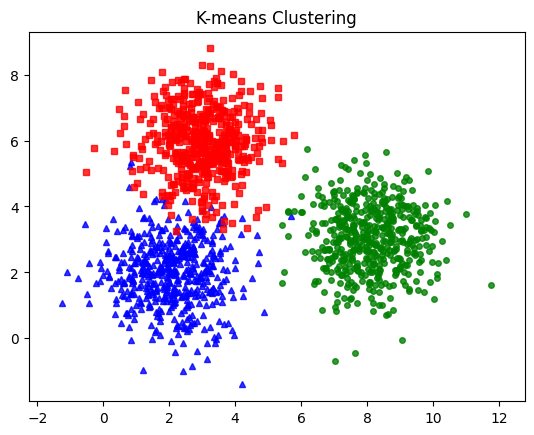

In [56]:
def kmeans_display(X, label, centers=None):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

     # Vẽ tâm cụm
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, marker='*', label='Centers', zorder=10)

        # Vẽ ranh giới
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
        grid = np.c_[xx.ravel(), yy.ravel()]
        grid_labels = kmeans_assign_labels(grid, centers)
        zz = grid_labels.reshape(xx.shape)
        plt.contourf(xx, yy, zz, alpha=0.2, levels=np.arange(K+1)-0.5, colors=['blue','green','red'])

    plt.axis('equal')
    plt.title('K-means Clustering')
    plt.show()
    
kmeans_display(X, original_label)

### Hàm chính của K-means clustering:

In [57]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)] # Khởi tạo centers
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

### Áp dụng thuật toán

Số lần lặp: 6


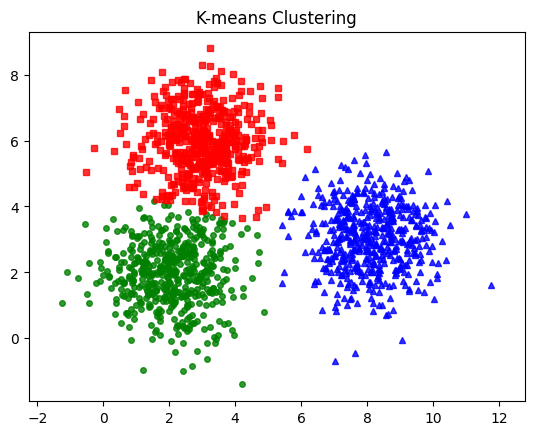

Centers cuối cùng:
[[8.08403668 3.04412029]
 [2.06841576 1.9612448 ]
 [2.96953039 5.95127727]]


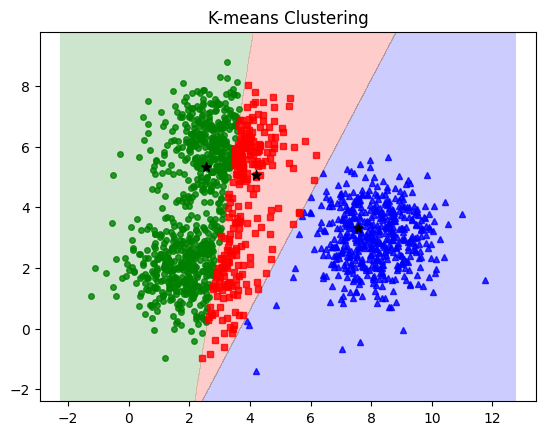

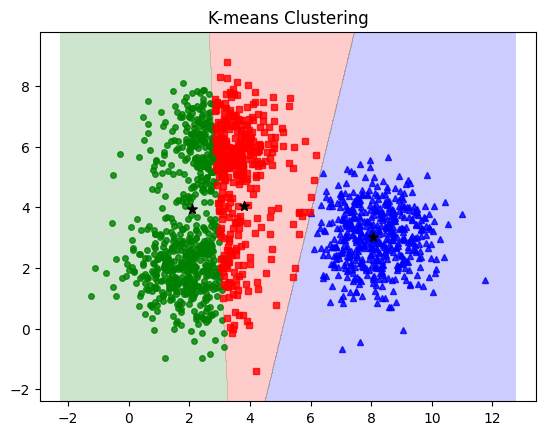

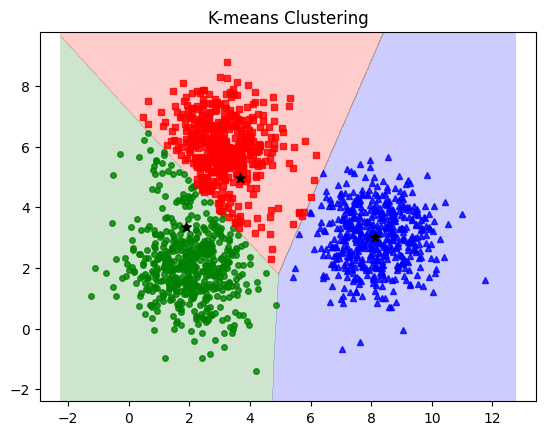

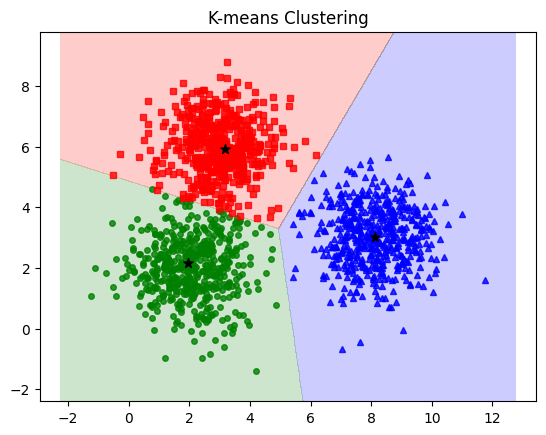

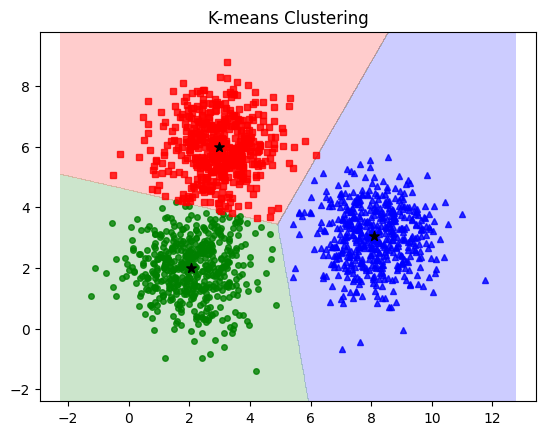

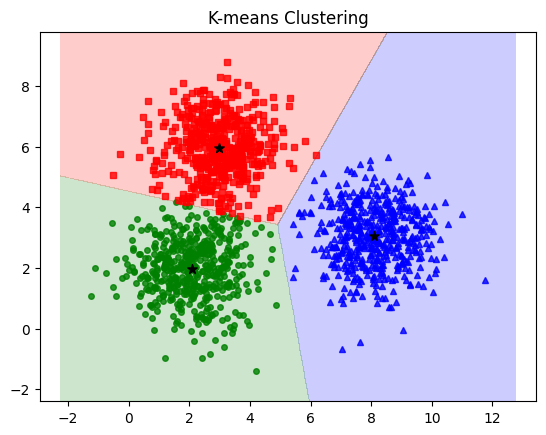

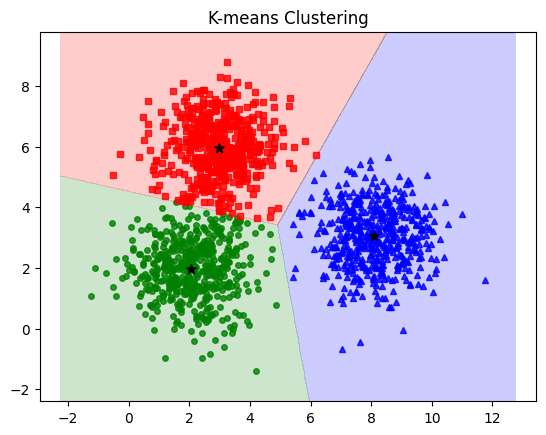

In [58]:
(centers, labels, it) = kmeans(X, K)
print("Số lần lặp:", it)   
kmeans_display(X, labels[-1]) # Hiển thị kết quả phân cụm cuối cùng
print("Centers cuối cùng:") 
print(centers[-1]) # Hiển thị các centers cuối cùng
for i in range(it+1):
    kmeans_display(X, labels[i], centers[i]) # Hiển thị kết quả phân cụm qua từng vòng lặp